In [1]:
import pandas as pd
df = pd.read_csv('global_remote_work_wellbeing.csv')
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

Rows: 10000, Columns: 10


,Employee_ID,Daily_Working_Hours,Screen_Time,Meetings_Attended,Emails_Sent,Productivity_Score,Stress_Level,Physical_Activity_Steps,Sleep_Duration,Work_Life_Balance_Satisfaction
0,E00001,7.0,5.6,5,30,3,5,11501,5.8,4
1,E00002,11.6,5.3,1,30,5,6,5742,8.7,2
2,E00003,9.9,4.2,3,21,8,4,4852,4.7,1
3,E00004,8.8,7.3,4,99,1,9,11928,4.3,2
4,E00005,5.2,6.3,4,87,2,3,7665,7.9,7


In [5]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('global_remote_work_wellbeing.csv')

# Step 2: Show original shape
print("Original shape:", df.shape)

# Step 3: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 4: Remove rows with any missing (NaN) values
df.dropna(inplace=True)

# Step 5: Standardize column names (lowercase + snake_case)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Step 6: Show cleaned shape
print("Cleaned shape:", df.shape)

# Step 7: Save cleaned data to a new CSV
df.to_csv("cleaned_remote_work.csv", index=False)

print("\nData cleaned successfully!")
print("Rows:", df.shape[0])
print("Columns:", df.columns.tolist())


Original shape: (10000, 10)
Cleaned shape: (10000, 10)

Data cleaned successfully!
Rows: 10000
Columns: ['employee_id', 'daily_working_hours', 'screen_time', 'meetings_attended', 'emails_sent', 'productivity_score', 'stress_level', 'physical_activity_steps', 'sleep_duration', 'work_life_balance_satisfaction']


In [6]:
!pip install pymongo

  Using cached dnspython-2.7.0-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/847.1 kB ? eta -:--:--
   ------------ --------------------------- 262.1/847.1 kB ? eta -:--:--
   ---------------------------------------- 847.1/847.1 kB 2.5 MB/s eta 0:00:00
Using cached dnspython-2.7.0-py3-none-any.whl (313 kB)

   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   ---------------------------------------- 0/2 [dnspython]
   -------------------- ------------------- 1/2 [pymongo]
   -------------------- ------------------- 1/2 [pymongo

In [15]:
collection.delete_many({})  # Deletes all existing records in the collection



DeleteResult({'n': 20000, 'electionId': ObjectId('7fffffff0000000000000262'), 'opTime': {'ts': Timestamp(1746587693, 510), 't': 610}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1746587693, 510), 'signature': {'hash': b'{P\xfe\x8e\xe7\x11\x02\xb9\x9cn\xfe\xe7\xa6\x9c\xc5k\x86\x99A*', 'keyId': 7460635802658144291}}, 'operationTime': Timestamp(1746587693, 510)}, acknowledged=True)

In [17]:
from pymongo import MongoClient
import json

client = MongoClient("mongodb://localhost:27017")

db = client["remote_work_db"]
collection = db["wellbeing"]

# Load cleaned CSV and insert as JSON
data = pd.read_csv("cleaned_remote_work.csv")
collection.insert_many(json.loads(data.to_json(orient="records")))
print("Total records in MongoDB:", collection.count_documents({}))


Total records in MongoDB: 10000


In [18]:
print("Number of rows in MongoDB:", collection.count_documents({}))


Number of rows in MongoDB: 10000


In [19]:
sample_doc = collection.find_one()
print("Number of columns:", len(sample_doc))

Number of columns: 11


In [28]:
pipeline = [
    {"$group": {"_id": "$region", "stress_level": {"$avg": "$stress_level"}}},
    {"$sort": {"stress_level": -1}}
]
results = list(collection.aggregate(pipeline))
results[:11]

[{'_id': None, 'stress_level': 5.528}]

In [32]:
print(df.columns.tolist())
print(df.head())


['employee_id', 'daily_working_hours', 'screen_time', 'meetings_attended', 'emails_sent', 'productivity_score', 'stress_level', 'physical_activity_steps', 'sleep_duration', 'work_life_balance_satisfaction']
  employee_id  daily_working_hours  screen_time  meetings_attended  \
0      E00001                  7.0          5.6                  5   
1      E00002                 11.6          5.3                  1   
2      E00003                  9.9          4.2                  3   
3      E00004                  8.8          7.3                  4   
4      E00005                  5.2          6.3                  4   

   emails_sent  productivity_score  stress_level  physical_activity_steps  \
0           30                   3             5                    11501   
1           30                   5             6                     5742   
2           21                   8             4                     4852   
3           99                   1             9                

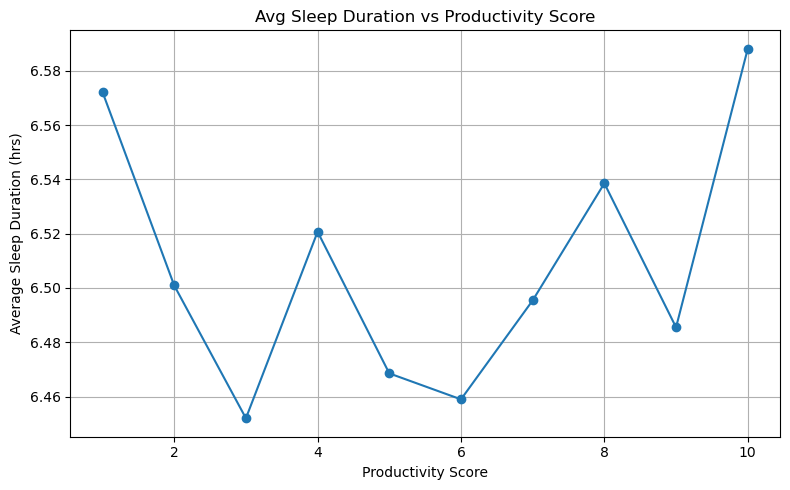

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data (if not already loaded)
df = pd.read_csv("cleaned_remote_work.csv")

# Group by productivity score
grouped = df.groupby("productivity_score")["sleep_duration"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(grouped["productivity_score"], grouped["sleep_duration"], marker='o')
plt.title("Avg Sleep Duration vs Productivity Score")
plt.xlabel("Productivity Score")
plt.ylabel("Average Sleep Duration (hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()


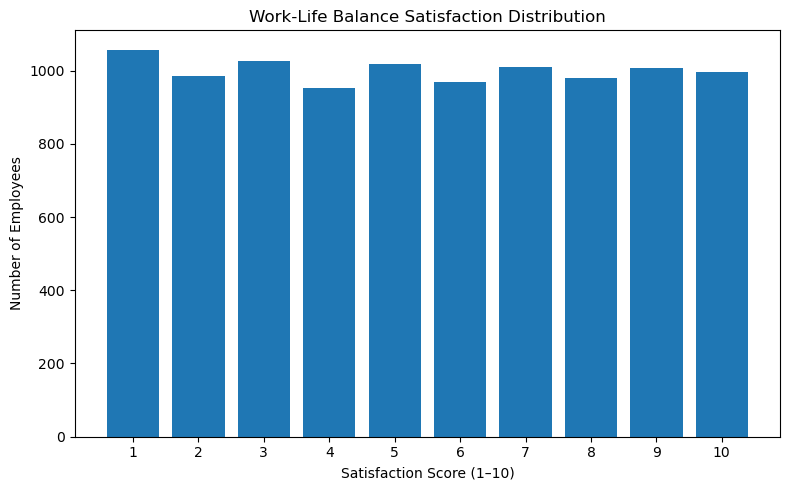

In [34]:
# Count how many employees have each satisfaction score
counts = df["work_life_balance_satisfaction"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Work-Life Balance Satisfaction Distribution")
plt.xlabel("Satisfaction Score (1–10)")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


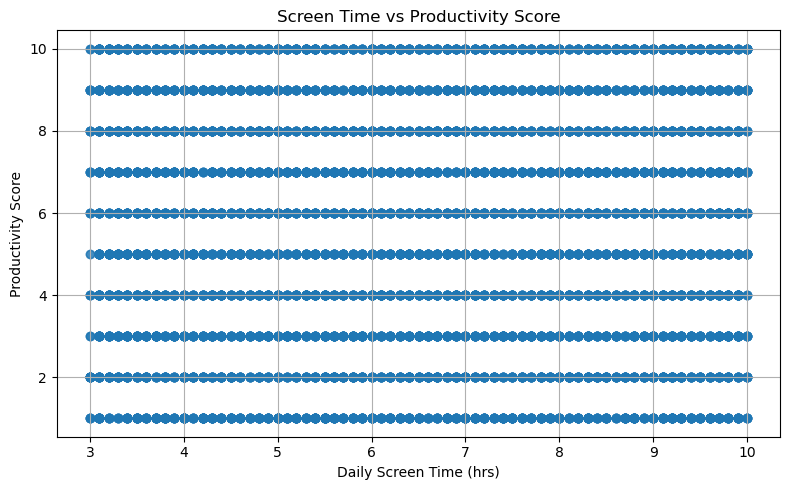

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(df["screen_time"], df["productivity_score"], alpha=0.6)
plt.title("Screen Time vs Productivity Score")
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Productivity Score")
plt.grid(True)
plt.tight_layout()
plt.show()


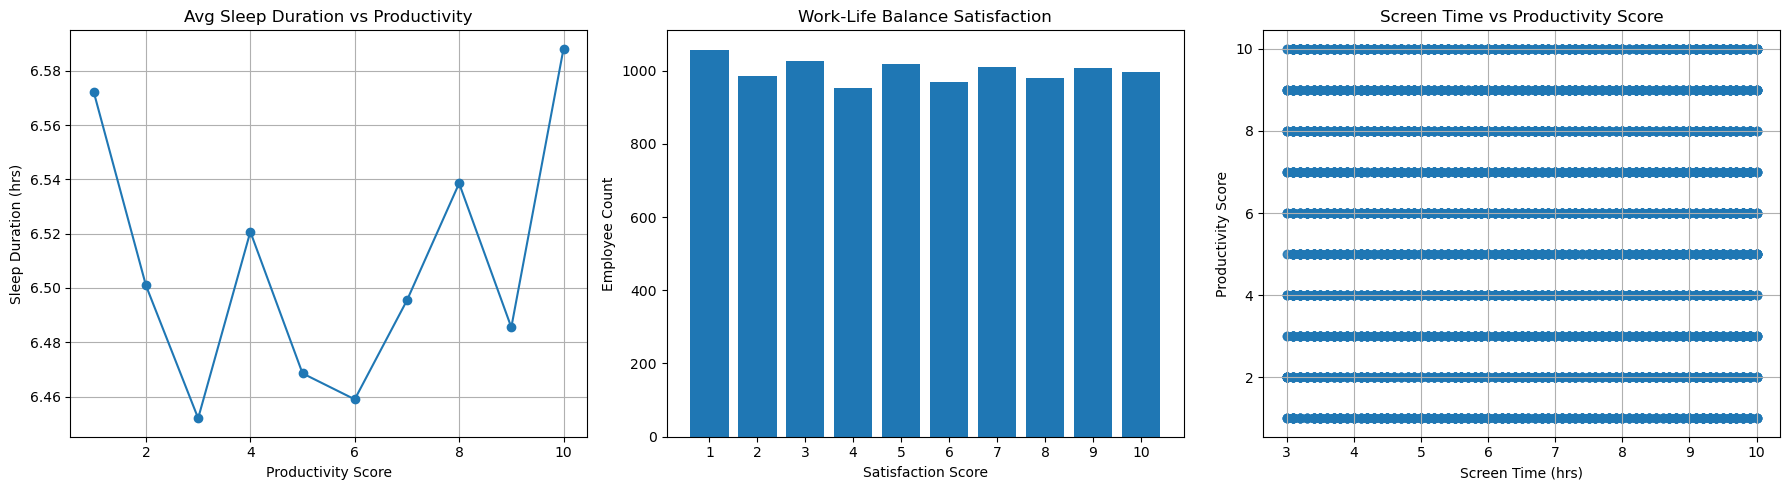

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("cleaned_remote_work.csv")

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Line Chart: Sleep vs Productivity Score ---
grouped_sleep = df.groupby("productivity_score")["sleep_duration"].mean().reset_index()
axes[0].plot(grouped_sleep["productivity_score"], grouped_sleep["sleep_duration"], marker='o')
axes[0].set_title("Avg Sleep Duration vs Productivity")
axes[0].set_xlabel("Productivity Score")
axes[0].set_ylabel("Sleep Duration (hrs)")
axes[0].grid(True)

# --- 2. Bar Chart: Work-Life Satisfaction ---
balance_counts = df["work_life_balance_satisfaction"].value_counts().sort_index()
axes[1].bar(balance_counts.index.astype(str), balance_counts.values)
axes[1].set_title("Work-Life Balance Satisfaction")
axes[1].set_xlabel("Satisfaction Score")
axes[1].set_ylabel("Employee Count")

# --- 3. Scatter Plot: Screen Time vs Productivity ---
axes[2].scatter(df["screen_time"], df["productivity_score"], alpha=0.6)
axes[2].set_title("Screen Time vs Productivity Score")
axes[2].set_xlabel("Screen Time (hrs)")
axes[2].set_ylabel("Productivity Score")
axes[2].grid(True)

# Final layout
plt.tight_layout()
plt.show()


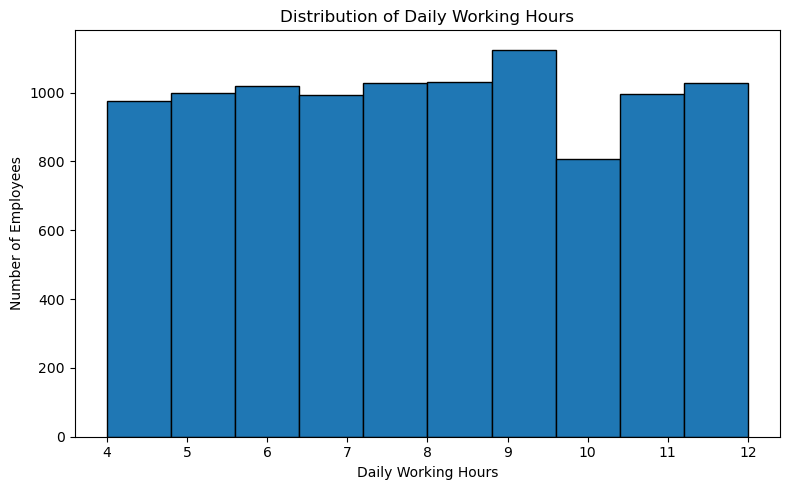

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(df["daily_working_hours"], bins=10, edgecolor='black')
plt.title("Distribution of Daily Working Hours")
plt.xlabel("Daily Working Hours")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


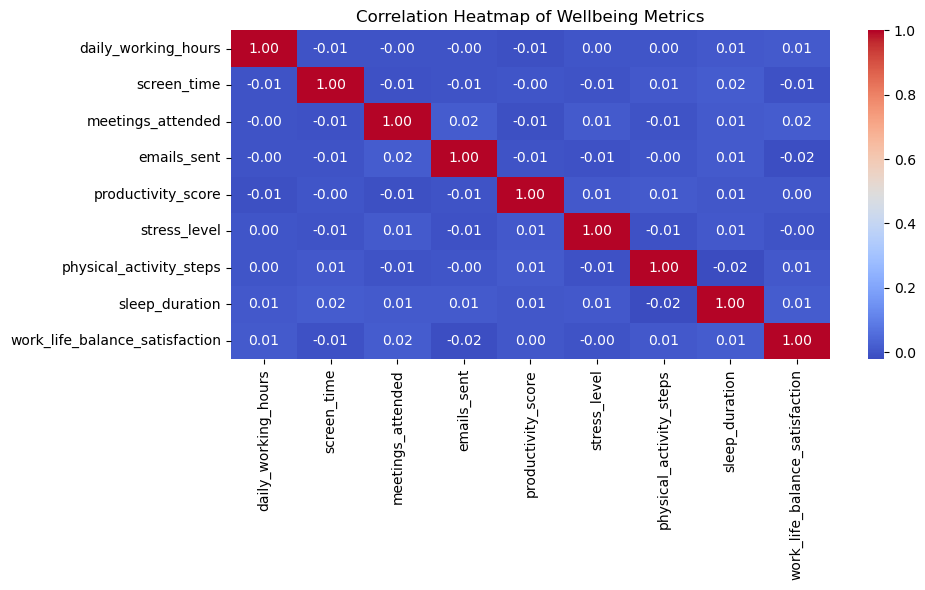

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation_matrix = df.drop(columns=["employee_id"]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Wellbeing Metrics")
plt.tight_layout()
plt.show()


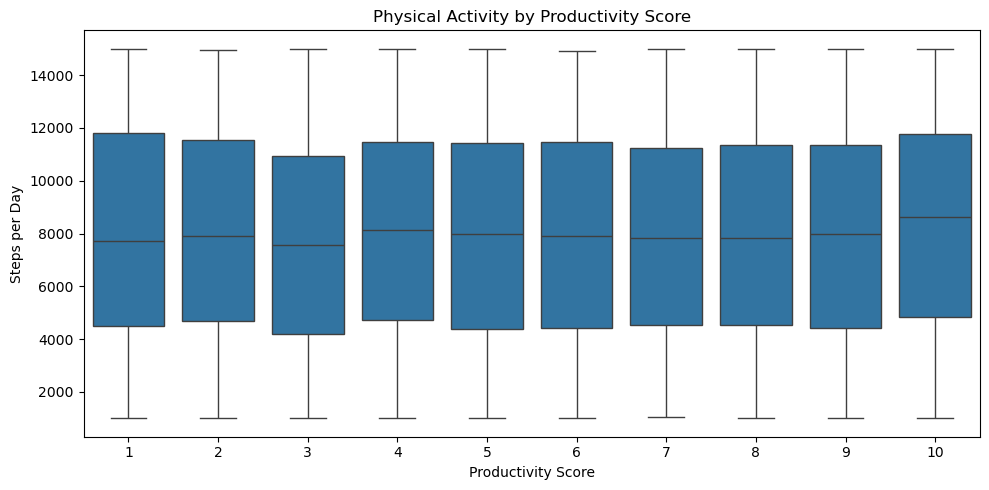

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="productivity_score", y="physical_activity_steps", data=df)
plt.title("Physical Activity by Productivity Score")
plt.xlabel("Productivity Score")
plt.ylabel("Steps per Day")
plt.tight_layout()
plt.show()


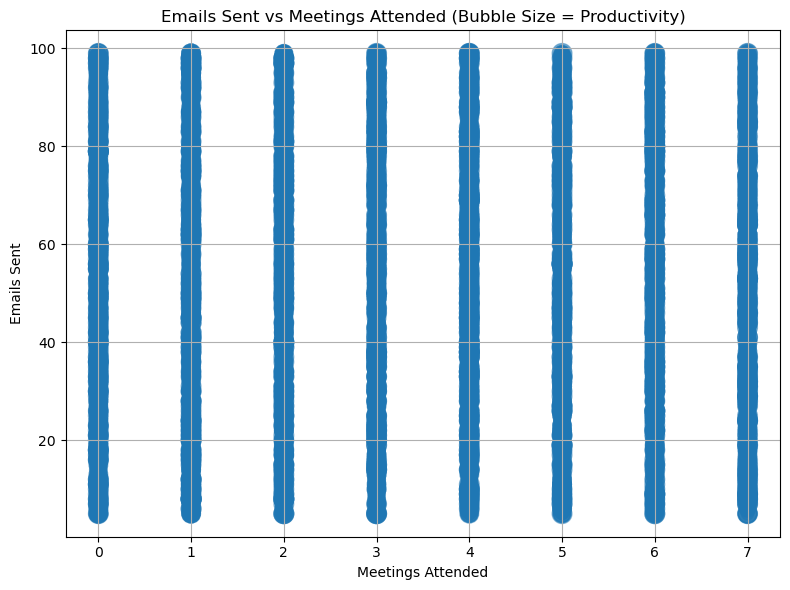

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(df["meetings_attended"], df["emails_sent"], s=df["productivity_score"]*20, alpha=0.5)
plt.title("Emails Sent vs Meetings Attended (Bubble Size = Productivity)")
plt.xlabel("Meetings Attended")
plt.ylabel("Emails Sent")
plt.grid(True)
plt.tight_layout()
plt.show()
